import pandas as pd
import matplotlib.pyplot as pp
import statistics as st
import numpy as np
import matplotlib
import seaborn as sns
import sklearn
from sklearn.cross_validation import train_test_split
from numpy.core.umath_tests import inner1d
from sklearn.metrics import confusion_matrix


In [256]:
file = 'Pharma Data.xlsx'
xl = pd.ExcelFile(file)
print(xl.sheet_names)
pharma = xl.parse('calib_012710')

['calib_012710', 'data dictionary', 'Unknown']


In [257]:
# create 2nd dataframe of data consolidated by month
pharma_month = pharma.groupby('Month')

IMSDR_stats = pharma_month["IMSDR"].agg([np.mean, np.std]) # create data frame to use as index

IMSDR_stats.reset_index(level=0, inplace=True) # create index for data frame above
pharma_month_stats = pd.concat([pharma_month["IMSDR"].agg([np.mean, np.std]),pharma_month["nrx"].agg([np.mean, np.std]),pharma_month["details"].agg([np.mean, np.std]),pharma_month["cnrx"].agg([np.mean, np.std]),pharma_month["own_atts"].agg([np.mean, np.std]),pharma_month["comp_atts"].agg([np.mean, np.std]),pharma_month["own_pdet"].agg([np.mean, np.std]), pharma_month["comp_pdet"].agg([np.mean, np.std]),pharma_month["lnrx"].agg([np.mean, np.std]),pharma_month["mon"].agg([np.mean, np.std]),pharma_month["rec"].agg([np.mean, np.std]),pharma_month["freq"].agg([np.mean, np.std]),pharma_month["mspc"].agg([np.mean, np.std])], axis=1, join_axes=[IMSDR_stats.index])

# insert columns names
pharma_month_stats.columns = ["IMSDR Avg.","IMSDR Std.","nrx Avg.","nrx Std.","details Avg.","details Std.","cnrx Avg.","cnrx Std.","own_atts Avg.","own_atts Std.","comp_atts Avg.","comp_atts Std.","own_pdet Avg.","own_pdet Std.","comp_pdet Avg.","comp_pdet Std.","lnrx Avg.","lnrx Std.","mon Avg.","mon Std.","rec Avg.","rec Std.","freq Avg.","freq Std.","mspc Avg.","mspc Std."]

# delete empty first row
pharma_month_stats = pharma_month_stats.iloc[1:]

# below are the stats of the columns code broken out in case we need separate data frames
IMSDR_stats = pharma_month["IMSDR"].agg([np.mean, np.std])
nrx_stats = pharma_month["nrx"].agg([np.mean, np.std])
cnrx_stats = pharma_month["cnrx"].agg([np.mean, np.std])
own_atts_stats = pharma_month["own_atts"].agg([np.mean, np.std])
comp_atts_stats = pharma_month["comp_atts"].agg([np.mean, np.std])
own_pdet_stats = pharma_month["own_pdet"].agg([np.mean, np.std])
comp_pdet_stats = pharma_month["comp_pdet"].agg([np.mean, np.std])
lnrx_stats = pharma_month["lnrx"].agg([np.mean, np.std])
mon_stats = pharma_month["mon"].agg([np.mean, np.std])
rec_stats = pharma_month["rec"].agg([np.mean, np.std])
freq_stats = pharma_month["freq"].agg([np.mean, np.std])
mspc_stats = pharma_month["mspc"].agg([np.mean, np.std])

# create another dataframe showing just monthly averages
pharma_month_avg = pd.concat([pharma_month["IMSDR"].agg([np.mean]),pharma_month["nrx"].agg([np.mean]),pharma_month["details"].agg([np.mean]),pharma_month["cnrx"].agg([np.mean]),pharma_month["own_atts"].agg([np.mean]),pharma_month["comp_atts"].agg([np.mean]),pharma_month["own_pdet"].agg([np.mean]), pharma_month["comp_pdet"].agg([np.mean]),pharma_month["lnrx"].agg([np.mean]),pharma_month["mon"].agg([np.mean]),pharma_month["rec"].agg([np.mean]),pharma_month["freq"].agg([np.mean]),pharma_month["mspc"].agg([np.mean])], axis=1, join_axes=[IMSDR_stats.index])
pharma_month_avg.columns = ["IMSDR Avg.","nrx Avg.","details Avg.","cnrx Avg.","own_atts Avg.","comp_atts Avg.","own_pdet Avg.","comp_pdet Avg.","lnrx Avg.","mon Avg.","rec Avg.","freq Avg.","mspc Avg."]

# delete empty first row
pharma_month_avg = pharma_month_avg.iloc[1:]


# create one last dataframe showing just averages by physician: 
pharma_ind = pharma.groupby('IMSDR')
doc_stats = pharma_ind["IMSDR"].agg([np.mean, np.std]) # create data frame to use as index

#doc_stats.reset_index(level=0, inplace=True) # create index for data frame above

pharma_ind_avg = pd.concat([pharma_ind["nrx"].agg([np.mean]),pharma_ind["details"].agg([np.mean]),pharma_ind["cnrx"].agg([np.mean]),pharma_ind["own_atts"].agg([np.mean]),pharma_ind["comp_atts"].agg([np.mean]),pharma_ind["own_pdet"].agg([np.mean]), pharma_ind["comp_pdet"].agg([np.mean]),pharma_ind["lnrx"].agg([np.mean]),pharma_ind["mon"].agg([np.mean]),pharma_ind["rec"].agg([np.mean]),pharma_ind["freq"].agg([np.mean]),pharma_ind["mspc"].agg([np.mean])], axis=1, join_axes=[doc_stats.index])
pharma_ind_avg.columns = ["nrx","details","cnrx","own_atts","comp_atts","own_pdet","comp_pdet","lnrx","mon","rec","freq","mspc"]

#get rid of all the NA fields: 
pharmaclean = pharma_ind_avg.dropna()



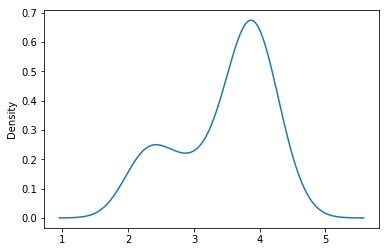

In [258]:
# 1.	Generate probability distributions of prescriptions of both the company’s drug and competitors’ drugs.
# nrx and cnrx variables are # of prescriptions of own drug and competeting drug, respectively
# look at density plots individually
pharma_month_avg['nrx Avg.'].plot.density(bw_method=None, ind=None)
# probability density plot of nrx, or own drug, prescriptions

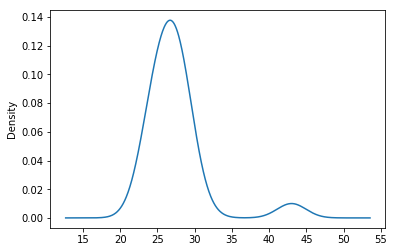

In [259]:
# probability density plot of cnrx, or competing drugs, prescriptions
pharma_month_avg['cnrx Avg.'].plot.density(bw_method=None, ind=None)

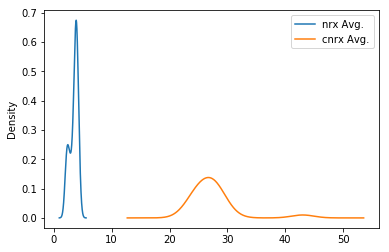

In [260]:
density = pd.DataFrame({'nrx Avg.': pharma_month_avg['nrx Avg.'],'cnrx Avg.': pharma_month_avg['cnrx Avg.']})
density.plot.kde() # smooth bandwidth roughly equal to 0.4
# the density of the average number of prescriptions of competing drugs is much wider than prescription of own drug
# competing drug prescriptions is normal, whereas own drug prescriptions is bimodal
# here are curves plotted on the same graph

Average percentage more sales of competing drugs: 0.5616011890356394


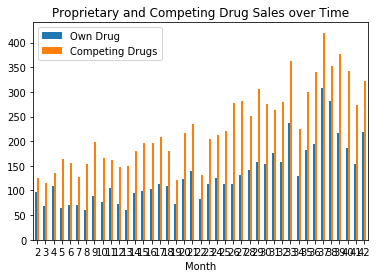

In [261]:
# 2.	Determine how well the sales of the drug stack against competing drug sales.
own_sales_sum = pharma_month["own_pdet"].agg([sum])
own_sales_sum.columns = ["Sales of Own Drug"]
own_sales_sum = own_sales_sum.iloc[1:] # remove empty first row
comp_sales_sum = pharma_month["comp_pdet"].agg([sum])
comp_sales_sum.columns = ["Sales of Competing Drugs"]
comp_sales_sum = comp_sales_sum.iloc[1:] # remove empty first row
sales_sum = pd.DataFrame({'Own Drug': own_sales_sum['Sales of Own Drug'],'Competing Drugs': comp_sales_sum['Sales of Competing Drugs']})
sales_sum.plot.bar(title = 'Proprietary and Competing Drug Sales over Time',rot=0)
# determine by how much competing drugs sales exceeds sales of own drug
sales_change = (own_sales_sum['Sales of Own Drug']/comp_sales_sum['Sales of Competing Drugs'])
sales_change = sales_change.iloc[1:] # remove empty first row


# make new dataframe showing this new column
sales_sum_all = pd.concat([own_sales_sum,comp_sales_sum,sales_change], axis=1, join_axes=[own_sales_sum.index])
print("Average percentage more sales of competing drugs:",st.mean(sales_change)) # on average, there are 56% more sales of competing drugs




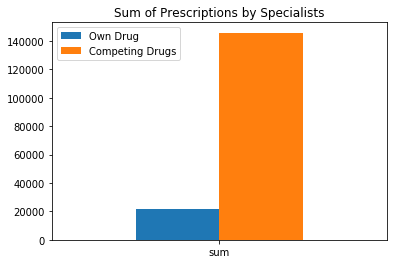

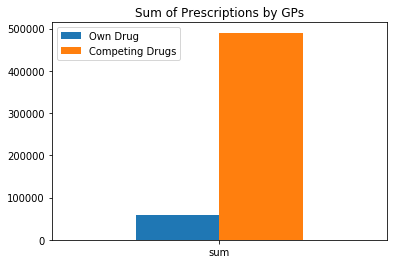

In [262]:
# 3. Determine whether specialists (SPs) or general practitioners (GPs) prescribe the company’s drug more than competing drugs.
prescriber_count = pd.DataFrame(pharma['mspc'].value_counts()) # 1 = specialist, 0 = general practitioner (GP)
# GPs prescribed 11214 more prescriptions than specialists
# determine which physicians prescribed which drugs
pharma_num_prescription = pharma[['nrx', 'cnrx', 'mspc']].copy() # create new dataframe with only these three variables
sp_prescription = pharma_num_prescription.loc[pharma_num_prescription['mspc'] == 1]
gp_prescription = pharma_num_prescription.loc[pharma_num_prescription['mspc'] == 0]
sp_sum = pd.concat([sp_prescription["nrx"].agg([sum]),sp_prescription["cnrx"].agg([sum])], axis=1,ignore_index=False)
sp_sum.columns = ["Own Drug","Competing Drugs"]
gp_sum = pd.concat([gp_prescription["nrx"].agg([sum]),gp_prescription["cnrx"].agg([sum])], axis=1,ignore_index=False)
gp_sum.columns = ["Own Drug","Competing Drugs"]
sp_sum.plot.bar(rot=0,title='Sum of Prescriptions by Specialists')
gp_sum.plot.bar(rot=0,title='Sum of Prescriptions by GPs')
# Prescriptions of competing drugs by both SPs and GPs far exceeds prescriptions of own drug.


NRX Correlations:
nrx          1.000000
details      0.482506
cnrx         0.436767
own_atts     0.188323
comp_atts    0.088319
own_pdet     0.191438
comp_pdet    0.161555
lnrx         0.998554
mon          0.997298
rec         -0.458308
freq         0.549174
mspc         0.026575
Name: nrx, dtype: float64
MSPC Correlations:
details      0.027048
cnrx        -0.106197
own_atts    -0.058553
comp_atts   -0.076954
own_pdet     0.159637
comp_pdet    0.148997
lnrx         0.028175
mon          0.025787
rec         -0.018063
freq         0.032698
mspc         1.000000
Name: mspc, dtype: float64


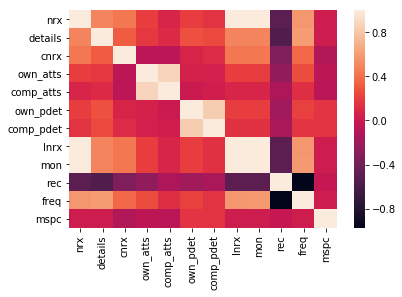

In [267]:
# 4.	Determine which variables are more predictive of whether the target 
#drug is prescribed. Perform PCA to reduce the number of variables and 
#focus on the most predictive ones.

#round all values to nearest integer: 
pharmaint = pharmaclean.round()

#calculate correlations using pandas's .corr() function in the Pearson method, which evaluates continuous variables: 
#print(pharma_ind_avg.corr(method='pearson'))

#calculate correlation between nrx and all other fields, except months: 
print("NRX Correlations:")
print(pharmaint[pharmaint.columns[0:]].corr(method='pearson')['nrx'])

#calculate correlation between mspc and all other fields, except months: 
print("MSPC Correlations:")
print(pharmaint[pharmaint.columns[1:]].corr(method='pearson')['mspc'])

%matplotlib inline
#draw heatmap of correlations between values in pharma_month_avg
corr = pharma_ind_avg.corr(method='pearson')
sns.heatmap(corr,
    xticklabels=corr.columns,
    yticklabels=corr.columns)

#with the above, we can see that the number of target drugs prescribed is of course best correlated 
#with the log of that value and its monetary value, neither of which can really be predictive. 

#Aside from that, we can see some correlation in the number of details provided/calls made (.48) 
#and number of competitor prescriptions written (.44, this is likely just a matter of patient volume.) 

#for MSPC, we see very few variables that correlate highly. 

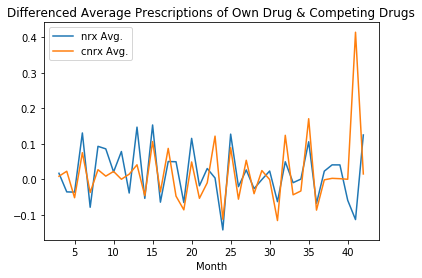

In [245]:
#5. Plot the differenced log transform of both prescriptions of the company’s drug and competing drugs as 
#well as average estimated sales.

# plot the lag difference of the average prescriptions, which takes the log transform and then takes the difference 
#of the rows for each row/month to stabilize the mean. 
#Essentially, it helps to stabilize any variations in the data. 

from matplotlib import pyplot
nrx = pharma_month_avg["nrx Avg."]
nrx_diff = np.log(nrx).diff()
nrx_diff.plot(legend=True)

cnrx = pharma_month_avg["cnrx Avg."]
cnrx_diff = np.log(cnrx).diff()
cnrx_diff.plot(title = "Differenced Average Prescriptions of Own Drug & Competing Drugs",legend=True)
# We see that the lagged data do not show any trends, signifying randomness in the pharma dataset

#pharma_month_avg.plot(y="lnrx Avg.",use_index=True)

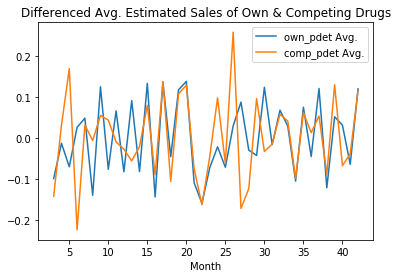

In [210]:
# For kicks and gigs, let's also look at average estimated monthly sales of the drugs
own_pdet = pharma_month_avg["own_pdet Avg."]
own_pdet_diff = np.log(own_pdet).diff()
own_pdet_diff.plot(legend=True)

comp_pdet = pharma_month_avg["comp_pdet Avg."]
comp_pdet_diff = np.log(comp_pdet).diff()
comp_pdet_diff.plot(legend=True, title="Differenced Avg. Estimated Sales of Own & Competing Drugs")

# In each diff log plot, the y-axis represents a percentage in either prescriptions or sales value at a certain month.
# The change in Y for the comparative variables is very similar; there are not distinct variations between them.

In [288]:
# 6.	Using linear regression, we will try to execute predictive modeling, splitting the data between a training dataset 
#and a testing dataset, to predict if the prescriber is a SP or GP or the number of new prescriptions of the company’s drug. 
#We will first try to construct a model using Naïve Bayes, with the results represented by a confusion matrix.

from sklearn.cross_validation import train_test_split

train, test = train_test_split(pharmaint, test_size = 0.4)
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)
                        
label_train = train.nrx
features_train = train.iloc[:,1:]

label_test = test.nrx
features_test = test.iloc[:,1:]


from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)

from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(pred_train,label_train)
accuracy_test = accuracy_score(pred_test,label_test)

print('Random Forest train accuracy: %',accuracy_train*100)
print('Random Forest test accuracy: %',accuracy_test*100)

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

nb_pred = gnb.fit(features_train, label_train).predict(features_train)
nb_test_pred = gnb.fit(features_test, label_test).predict(features_test)

nb_accuracy = accuracy_score(nb_pred, label_train)
nb_test_accuracy = accuracy_score(nb_test_pred, label_test)
print("Naive Bayes train accuracy: %", nb_accuracy*100)
print("Naive Bayes test accuracy: %", nb_test_accuracy*100)

from sklearn import metrics
print('Naive Bayes Classification Report:')
print(metrics.classification_report(label_test, nb_test_pred))
print("Naive Bayes Confusion Matrix:")
print(metrics.confusion_matrix(label_test, nb_test_pred))



Random Forest train accuracy: % 99.09909909909909
Random Forest test accuracy: % 84.23423423423422
Naive Bayes train accuracy: % 94.8948948948949
Naive Bayes test accuracy: % 93.24324324324324
Naive Bayes Classification Report:
             precision    recall  f1-score   support

        0.0       0.97      1.00      0.99        37
        1.0       1.00      0.97      0.98        63
        2.0       0.95      1.00      0.98        40
        3.0       1.00      0.94      0.97        17
        4.0       1.00      1.00      1.00        13
        5.0       1.00      0.20      0.33        15
        6.0       0.37      1.00      0.54         7
        7.0       1.00      1.00      1.00         5
        8.0       1.00      1.00      1.00         4
        9.0       1.00      1.00      1.00         4
       10.0       1.00      1.00      1.00         1
       11.0       1.00      1.00      1.00         4
       12.0       1.00      1.00      1.00         1
       14.0       1.00      1

In [307]:
#Finally, we run a linear regression report for nrx, then mspc below, using the statsmodels.api package: 

import statsmodels.api as sm

label_train = train.nrx
features_train = train.iloc[:,1:]

label_test = test.nrx
features_test = test.iloc[:,1:]

model = sm.OLS( label_train, features_train).fit()

predictions = model.predict(features_train)

model.summary()

#The summary shows that we have an R-squared of .997, which is really great.
#However, it can still be mostly attributed to the fact that so many other
#variables are directly correlated to the number of prescriptions written. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    nrx   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.104e+04
Date:                Sun, 09 Dec 2018   Prob (F-statistic):               0.00
Time:                        18:38:43   Log-Likelihood:                -20.947
No. Observations:                 333   AIC:                             63.89
Df Residuals:                     322   BIC:                             105.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
details        0.0028      0.015      0.184      0.854      -0.027       0.033
cnrx          -0.0006      0.001     -0.630      0.529      -0.002       0.001
own_atts      -0.0033      0.028     -0.117      0.907      -0.058       0.052
comp_atts     -0.0461      0.030     -1.556      0.121      -0.104       0.012
own_pdet      -0.0346      0.030     -1.150      0.251      -0.094       0.025
comp_pdet      0.0226      0.030      0.756      0.450      -0.036       0.081
lnrx           0.6702      0.045     14.993      0.000       0.582       0.758
mon            0.1174      0.015      7.846      0.000       0.088       0.147
rec           -0.1050      0.023     -4.646      0.000      -0.149      -0.061
freq          -0.0991      0.027     -3.700      0.000      -0.152      -0.046
mspc          -0.0351      0.034     -1.032      0.303      -0.102       0.032
==============================================================================
Omnibus:                       99.198   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              616.997
Skew:                           1.074   Prob(JB):                    1.05e-134
Kurtosis:                       9.313   Cond. No.                         128.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [278]:
from sklearn.cross_validation import train_test_split

# now we try to determine whether the physician is a GP or a Specialist 
#1 is a specialist, 0 is a general practitioner. 

train, test = train_test_split(pharmaint, test_size = 0.4)
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

#switch the goal to "mspc" instead of "nrx": 
plabel_train = train.mspc
pfeatures_train = train.iloc[:,0:10]

plabel_test = test.mspc
pfeatures_test = test.iloc[:,0:10]

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

clf.fit(pfeatures_train,plabel_train)

ppred_train = clf.predict(pfeatures_train)
ppred_test = clf.predict(pfeatures_test)

from sklearn.metrics import accuracy_score
paccuracy_train = accuracy_score(ppred_train, plabel_train)
paccuracy_test = accuracy_score(ppred_test, plabel_test)

print('Random Forest train accuracy: %', paccuracy_train*100)
print('Random Forest test accuracy: %', paccuracy_test*100)

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

pnb_pred = gnb.fit(pfeatures_train, plabel_train).predict(pfeatures_train)
pnb_test_pred = gnb.fit(pfeatures_test, plabel_test).predict(pfeatures_test)

pnb_accuracy = accuracy_score(nb_pred, label_train)
pnb_test_accuracy = accuracy_score(nb_test_pred, label_test)
print("Naive Bayes train accuracy: %", pnb_accuracy*100)
print("Naive Bayes test accuracy: %", pnb_test_accuracy*100)

from sklearn import metrics
print('Naive Bayes Classification Report:')
print(metrics.classification_report(plabel_test, pnb_test_pred))
print("Naive Bayes Confusion Matrix:")
print(metrics.confusion_matrix(plabel_test, pnb_test_pred))



Random Forest train accuracy: % 97.2972972972973
Random Forest test accuracy: % 72.52252252252252
Naive Bayes train accuracy: % 96.996996996997
Naive Bayes test accuracy: % 89.63963963963964
Naive Bayes Classification Report:
             precision    recall  f1-score   support

          0       0.79      0.88      0.83       173
          1       0.30      0.18      0.23        49

avg / total       0.68      0.73      0.70       222

Naive Bayes Confusion Matrix:
[[152  21]
 [ 40   9]]


In [306]:
import statsmodels.api as sm

plabel_train = train.mspc
pfeatures_train = train.iloc[:,0:10]

plabel_test = test.mspc
pfeatures_test = test.iloc[:,0:10]

pmodel = sm.OLS(plabel_train, pfeatures_train).fit()

ppredictions = pmodel.predict(pfeatures_train)

pmodel.summary()

#Here, as with the NB prediction models, we see a much lower R-squared score,
#as there are are so few variables that correlate to what type of doctor
#there is. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   mspc   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     15.01
Date:                Sun, 09 Dec 2018   Prob (F-statistic):           5.55e-22
Time:                        18:12:31   Log-Likelihood:                -185.49
No. Observations:                 333   AIC:                             391.0
Df Residuals:                     323   BIC:                             429.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
nrx           -0.1068      0.089     -1.199      0.231      -0.282       0.068
details        0.0087      0.024      0.360      0.719      -0.039       0.056
cnrx          -0.0050      0.001     -3.579      0.000      -0.008      -0.002
own_atts      -0.0265      0.045     -0.584      0.560      -0.116       0.063
comp_atts      0.0010      0.048      0.020      0.984      -0.093       0.095
own_pdet      -0.0426      0.049     -0.865      0.388      -0.139       0.054
comp_pdet      0.0998      0.049      2.054      0.041       0.004       0.195
lnrx           0.2612      0.091      2.884      0.004       0.083       0.439
mon           -0.0438      0.027     -1.649      0.100      -0.096       0.008
rec            0.0393      0.030      1.298      0.195      -0.020       0.099
==============================================================================
Omnibus:                       53.182   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.734
Skew:                           0.951   Prob(JB):                     4.79e-13
Kurtosis:                       2.314   Cond. No.                         183.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""